In [6]:
import os
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import torch.nn.functional as F
import numpy as np
learning_rate = 1e-4
keep_prob_rate = 0.7 #
max_epoch = 3
BATCH_SIZE = 50

DOWNLOAD_MNIST = False
if not(os.path.exists('./mnist/')) or not os.listdir('./mnist/'):
    # not mnist dir or mnist is empyt dir
    DOWNLOAD_MNIST = True


train_data = torchvision.datasets.MNIST(root='./mnist/',train=True, transform=torchvision.transforms.ToTensor(), download=DOWNLOAD_MNIST,)
train_loader = Data.DataLoader(dataset = train_data ,batch_size= BATCH_SIZE ,shuffle= True)

test_data = torchvision.datasets.MNIST(root = './mnist/',train = False)
test_x = Variable(torch.unsqueeze(test_data.test_data,dim  = 1),volatile = True).type(torch.FloatTensor)[:500]/255.
test_y = test_data.test_labels[:500].numpy()

# 对于训练数据
print("训练数据形状:", train_data.data.shape)

# 对于测试数据
print("测试数据形状:", test_x.shape)


class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d( # ???
                # patch 7 * 7 ; 1  in channels ; 32 out channels ; ; stride is 1
                # padding style is same(that means the convolution opration's input and output have the same size)
                in_channels=  1    ,  
                out_channels=  32   ,
                kernel_size=   7   ,
                stride=    1       ,
                padding=  (3,3) ,
            ),
            nn.ReLU(),        # activation function
            nn.MaxPool2d(2),  # pooling operation
        )
        self.conv2 = nn.Sequential( # ???
            # line 1 : convolution function, patch 5*5 , 32 in channels ;64 out channels; padding style is same; stride is 1
            # line 2 : choosing your activation funciont
            # line 3 : pooling operation function.
            nn.Conv2d( 
                in_channels=  32    ,  
                out_channels=  64   ,
                kernel_size=   5  ,
                stride=    1       ,
                padding=  (2,2) ,
            ),
            nn.ReLU(),        # activation function
            nn.MaxPool2d(2),  # pooling operation
         

        )
        self.out1 = nn.Linear( 7*7*64 , 1024 , bias= True)   # full connection layer one

        self.dropout = nn.Dropout(keep_prob_rate)
        self.out2 = nn.Linear(1024,10,bias=True)



    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0),-1)  # flatten the output of coonv2 to (batch_size ,32 * 7 * 7)    # ???
        out1 = self.out1(x)
        out1 = F.relu(out1)
        out1 = self.dropout(out1)
        out2 = self.out2(out1)
        output = F.softmax(out2)
        return output


def test(cnn):
    global prediction
    y_pre = cnn(test_x)
    _,pre_index= torch.max(y_pre,1)
    pre_index= pre_index.view(-1)
    prediction = pre_index.data.numpy()
    correct  = np.sum(prediction == test_y)
    return correct / 500.0


def train(cnn):
    optimizer = torch.optim.Adam(cnn.parameters(), lr=learning_rate )
    loss_func = nn.CrossEntropyLoss()
    for epoch in range(max_epoch):
        for step, (x_, y_) in enumerate(train_loader):
            x ,y= Variable(x_),Variable(y_)
            output = cnn(x)  
            loss = loss_func(output,y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            if step != 0 and step % 20 ==0:
                print("=" * 10,step,"="*5,"="*5, "test accuracy is ",test(cnn) ,"=" * 10 )

if __name__ == '__main__':
    cnn = CNN()
    train(cnn)




C:\Users\31486\AppData\Local\Temp\ipykernel_12116\2610993687.py:24: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  test_x = Variable(torch.unsqueeze(test_data.test_data,dim  = 1),volatile = True).type(torch.FloatTensor)[:500]/255.
C:\Users\31486\AppData\Local\Temp\ipykernel_12116\2610993687.py:81: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = F.softmax(out2)


训练数据形状: torch.Size([60000, 28, 28])
测试数据形状: torch.Size([500, 1, 28, 28])
========== 20 ===== ===== test accuracy is  0.182 ==========
========== 40 ===== ===== test accuracy is  0.256 ==========
========== 60 ===== ===== test accuracy is  0.452 ==========
========== 80 ===== ===== test accuracy is  0.534 ==========
========== 100 ===== ===== test accuracy is  0.61 ==========
========== 120 ===== ===== test accuracy is  0.622 ==========
========== 140 ===== ===== test accuracy is  0.686 ==========
========== 160 ===== ===== test accuracy is  0.698 ==========
========== 180 ===== ===== test accuracy is  0.726 ==========
========== 200 ===== ===== test accuracy is  0.736 ==========
========== 220 ===== ===== test accuracy is  0.748 ==========
========== 240 ===== ===== test accuracy is  0.75 ==========
========== 260 ===== ===== test accuracy is  0.76 ==========
========== 280 ===== ===== test accuracy is  0.762 ==========
========== 300 ===== ===== test accuracy is  0.78 ==========
=====

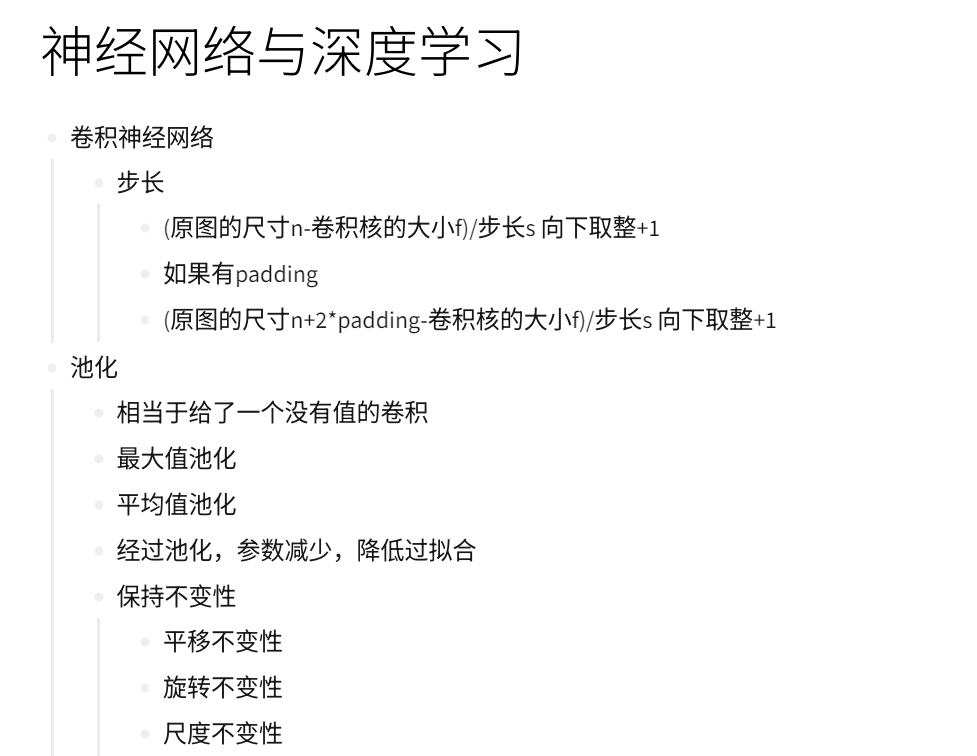